In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data  file :Car.csv

In [2]:
df =pd.read_csv('car data.csv')  

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 Printing the categorical string and numerical columns in dataset

### Car_Name is label data so we will drop it

In [64]:
df.drop('Car_Name',axis=1,inplace=True)

### Exploratory Data Analysis

In [65]:

categorical = [var for var in df.columns if df[var].dtype=='O']

df[categorical]



,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [66]:
numerical = [var for var in df.columns if df[var].dtype!='O']


df[numerical]

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,Years_Apart
0,2014,3.35,5.59,27000,0,2021,7
1,2013,4.75,9.54,43000,0,2021,8
2,2017,7.25,9.85,6900,0,2021,4
3,2011,2.85,4.15,5200,0,2021,10
4,2014,4.60,6.87,42450,0,2021,7
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2021,5
297,2015,4.00,5.90,60000,0,2021,6
298,2009,3.35,11.00,87934,0,2021,12
299,2017,11.50,12.50,9000,0,2021,4


Target variable is the selling price of the car based on other independant variables (predictors)

In [67]:
# Categorical Types : Uniqueness

df.select_dtypes(['object']).columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [68]:
# Multiclass variables
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


### Missing NA ,Null  

<AxesSubplot:>

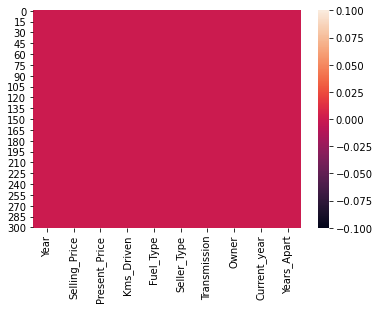

In [69]:
sns.heatmap(df.isna())

In [70]:
# checking for NA or NAn for Null
df.isnull().values.any()
df.isnull().sum()


Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Current_year     0
Years_Apart      0
dtype: int64

### Getting the proportion of Response Variable to know about the Unbalance of dataset

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Selling_Price'>

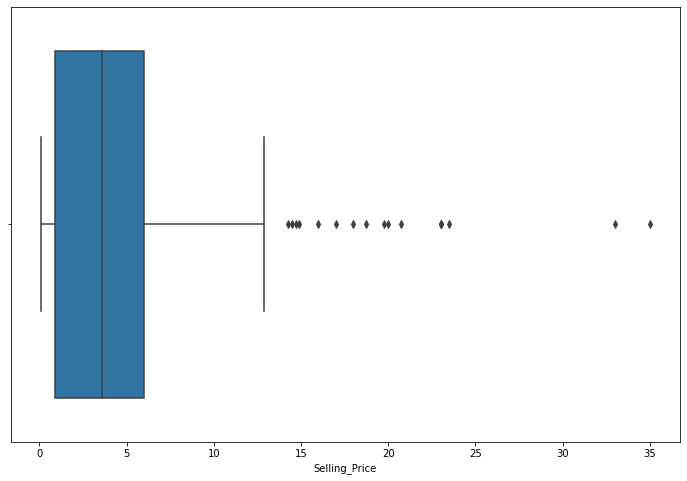

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Selling_Price',data=df, orient='v')

##  Boxplot of the above Selling Price  gives the following inferences:
 1. The middle portion that resembles little skewness to towards the right side, this indicates that our Selling      between 6 to 10 are more closer together than the part towards the left of the median

2. Signs of Left Skewness but its acutallu right skewed  due to Outliers present .(Unsually large numbers)

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

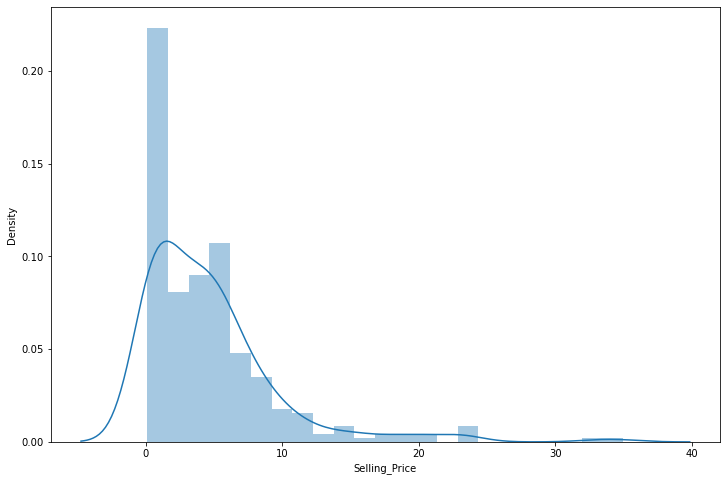

In [72]:
plt.figure(figsize=(12,8))
sns.distplot(df['Selling_Price'])

## 

### Deriving a new column for the year that car was sold in terms of current  year

In [73]:
# importing date class from datetime module 
from datetime import date 

td = date.today()
print("Current year:", td.year) 

Current year: 2021


In [13]:
df['Current_year'] = td.year
# Differnce between Year Column and current column
df['Years_Apart'] = df['Current_year']- df['Year']

In [74]:
df['Years_Apart'].value_counts()

#  There are lot of cars with huge differnce in years above 5

6     61
5     50
7     38
4     35
8     33
9     23
10    19
11    15
13     7
12     6
16     4
15     4
18     2
14     2
17     1
3      1
Name: Years_Apart, dtype: int64

<AxesSubplot:ylabel='Frequency'>

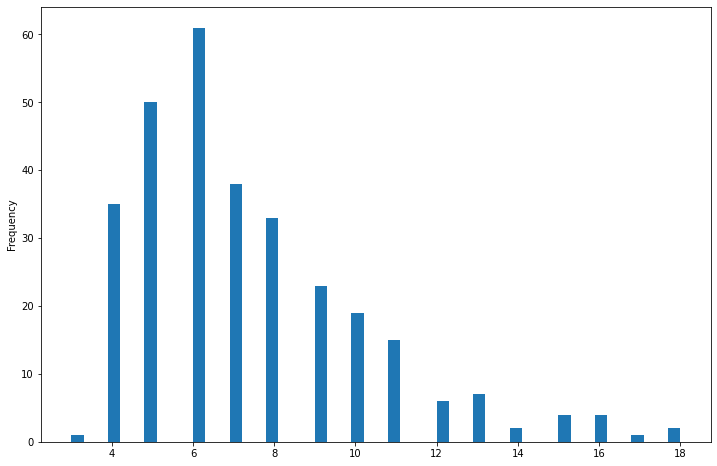

In [15]:
plt.figure(figsize=(12,8))
df['Years_Apart'].plot.hist(bins=50)

In [75]:
# Visualizing Petrol ,Deisel and CNG
print(df['Fuel_Type'].unique())

df.columns

['Petrol' 'Diesel' 'CNG']


Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_year', 'Years_Apart'],
      dtype='object')

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

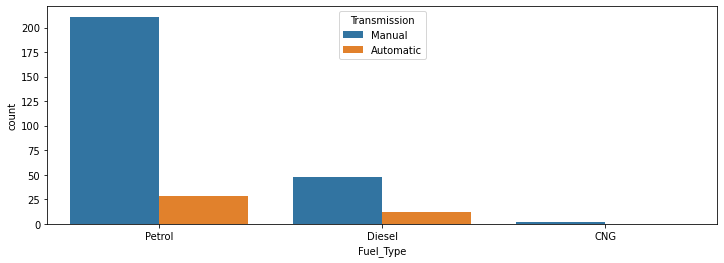

In [76]:
plt.figure(figsize=(12,4))
pdc = df[(df['Fuel_Type']=='petrol') | (df['Fuel_Type']=='Diesel') |   (df['Fuel_Type']=='CNG')]
sns.countplot(x='Fuel_Type',data= df,hue='Transmission')

<AxesSubplot:>

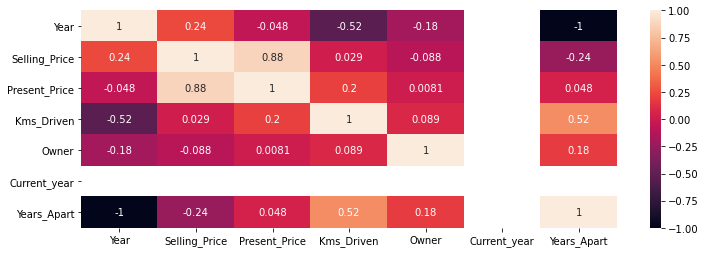

In [18]:
# Checking the correlation between the variables 
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True)

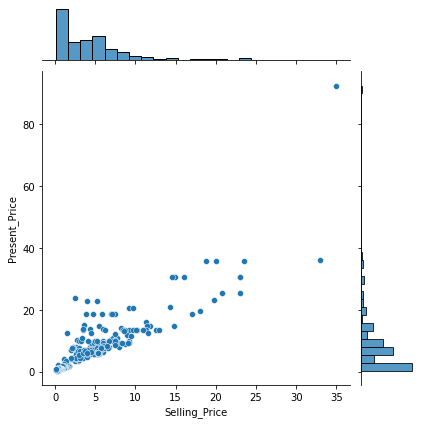

In [77]:
# There is a 0.88 correlation between Selling Price and Present Price    
sns.jointplot(x=df['Selling_Price'], y=df['Present_Price'])

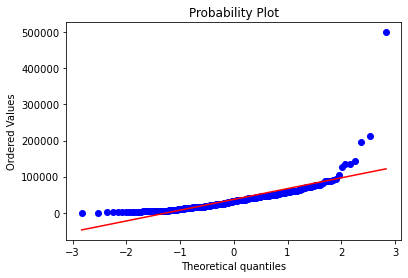

In [78]:
from scipy import stats
import pylab
stats.probplot(df['Kms_Driven'], dist = "norm", plot = pylab)
plt.show()


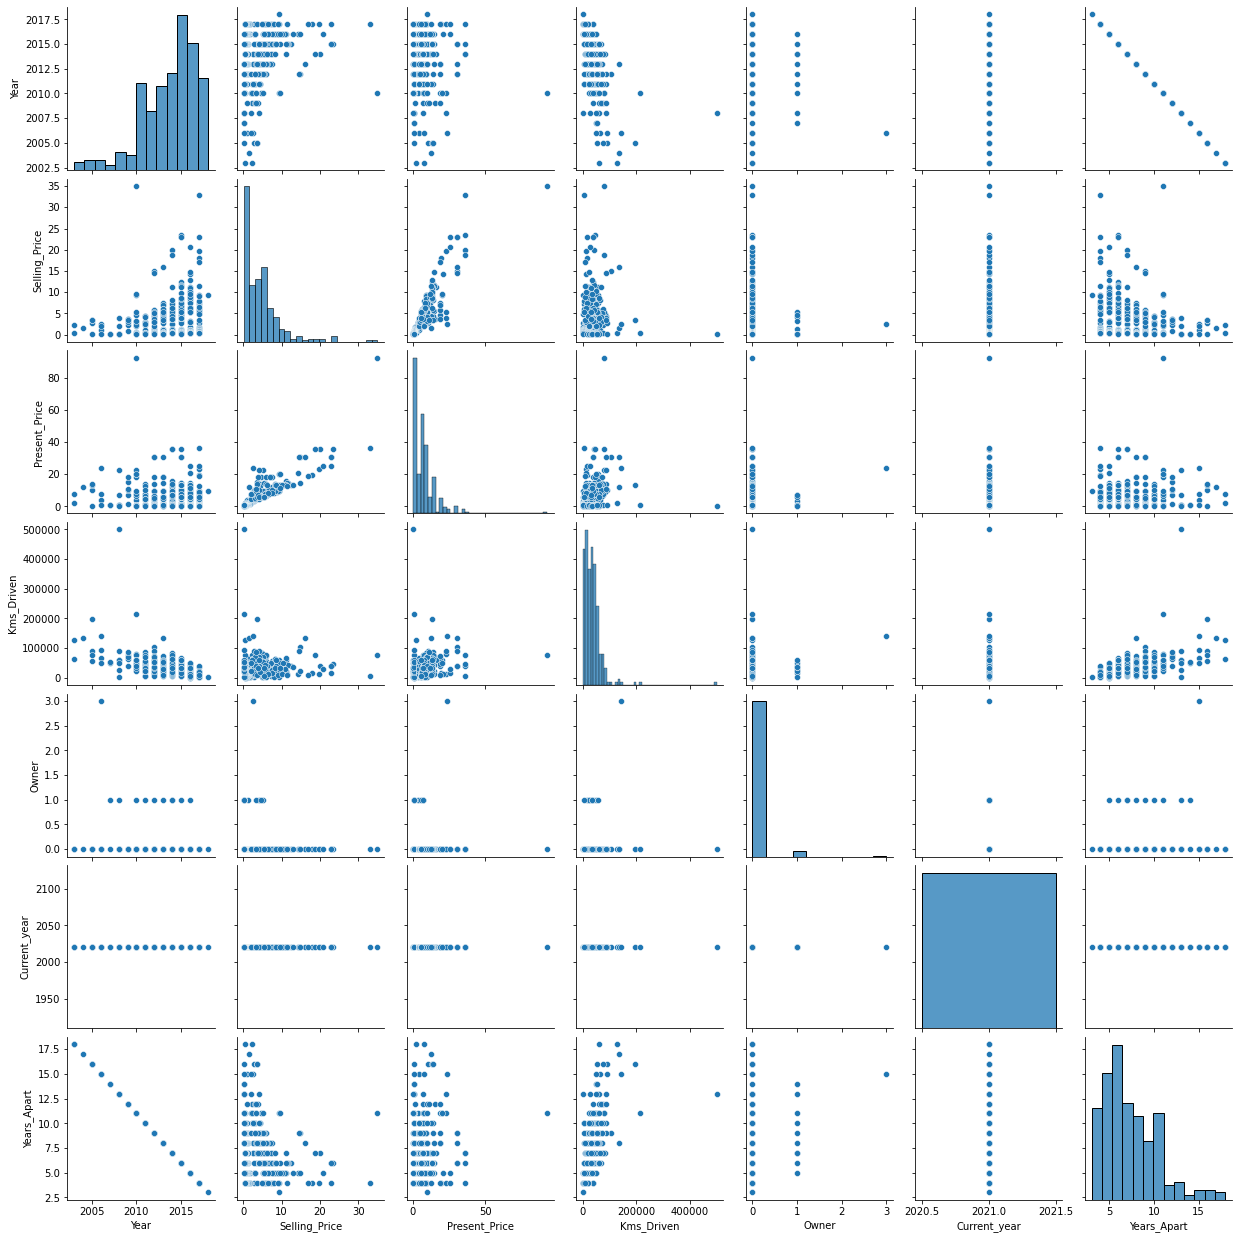

In [21]:
# All Influence in on pairplot
sns.pairplot(df.iloc[:,:])

In [79]:
plt.figure(figsize=(12,4))
sorted(df['Years_Apart'].dropna().unique())




[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

<Figure size 864x288 with 0 Axes>

<AxesSubplot:xlabel='Selling_Price', ylabel='count'>

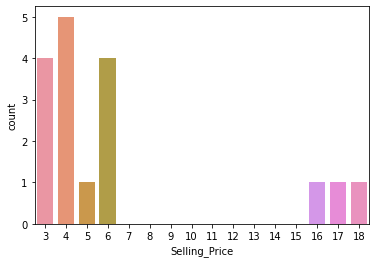

In [23]:
sort_yr =[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

sns.countplot(x='Selling_Price',data=df,order=sort_yr)

<AxesSubplot:>

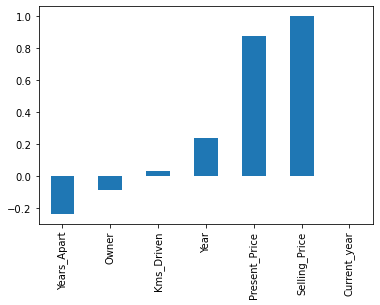

In [24]:
df.corr()['Selling_Price'].sort_values().plot(kind='bar')

In [25]:
# Dropping the year and Current year as we have done Feature Engineering for that column

In [80]:
final_df = df.drop(['Year','Current_year'],axis=1)

In [81]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Apart
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [28]:
# Dummies to get Categorical data into numerical and easy for our model to predict

In [82]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [83]:
final_df.columns.value_counts().sum()

9

In [84]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Apart,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_Apart,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


# X and y 

In [85]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [87]:
X.shape

(301, 8)

In [88]:
# Checking for VIF (Variance Influence Factor)
# preparing maodel considering all the variables 
import statsmodels.formula.api as smf # for regression model
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

ml1 = smf.ols('y~X', data=final_df).fit() # regression model

# Summary
ml1.summary()
# p-values for Administration, MarketingSpend are more than 0.05
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        18:35:31   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1882      1.330      3.901      0.000       2.571       7.805
X[0]           0.4372      0.016     27.355      0.000       0.406       0.469
X[1]       -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
X[2]          -0.6742      0.423     -1.595      0.112      -1.506       0.158
X[3]          -0.3931      0.043     -9.159      0.000      -0.478      -0.309
X[4]           2.4699      1.278      1.932      0.054      -0.046       4.986
X[5]           0.6077      1.259      0.483      0.630      -1.870       3.085
X[6]          -1.1213      0.257     -4.371      0.000      -1.626      -0.616
X[7]          -1.4482      0.328     -4.417      0.000      -2.093      -0.803
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# Checking for VIF (Variance Influence Factor)
# preparing maodel considering all the variables 
import statsmodels.formula.api as smf # for regression model
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

ml1 = smf.ols('y~X',data=final_df).fit() # regression model

# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Tue, 26 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        18:35:34   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1882      1.330      3.901      0.000       2.571       7.805
X[0]           0.4372      0.016     27.355      0.000       0.406       0.469
X[1]       -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
X[2]          -0.6742      0.423     -1.595      0.112      -1.506       0.158
X[3]          -0.3931      0.043     -9.159      0.000      -0.478      -0.309
X[4]           2.4699      1.278      1.932      0.054      -0.046       4.986
X[5]           0.6077      1.259      0.483      0.630      -1.870       3.085
X[6]          -1.1213      0.257     -4.371      0.000      -1.626      -0.616
X[7]          -1.4482      0.328     -4.417      0.000      -2.093      -0.803
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
#--------------------------------------VIF-----------------------------------------
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables (Non dummy variables)
rsq_pres = smf.ols('Present_Price~Kms_Driven + Owner +Years_Apart', data = final_df).fit().rsquared  
vif_1 = 1/(1 - rsq_pres) 
print(vif_1)

rsq_kms = smf.ols('Kms_Driven~Present_Price + Owner +Years_Apart', data = final_df).fit().rsquared  
vif_2 = 1/(1 - rsq_kms) 
print(vif_2)

rsq_owner = smf.ols('Owner~Present_Price + Kms_Driven +Years_Apart', data = final_df).fit().rsquared  
vif_3 = 1/(1 - rsq_owner) 
print(vif_3)

rsq_yrs = smf.ols('Years_Apart~Present_Price + Kms_Driven +Owner', data = final_df).fit().rsquared  
vif_4 = 1/(1 - rsq_yrs) 
print(vif_4)

1.0485543570361868
1.4429572363291157
1.0343580836040116
1.4222360887557164


In [91]:
dict_1 = {'Variables':['Present_Price', 'Kms_Driven', 'Owner','Years_Apart'], 'VIF':[vif_1, vif_2, vif_3,vif_4],}

type(dict_1)
Vif_df = pd.DataFrame(dict_1)  
Vif_df
# Final model (No need of removing  any column)------------------------------------------

,Variables,VIF
0,Present_Price,1.048554
1,Kms_Driven,1.442957
2,Owner,1.034358
3,Years_Apart,1.422236


In [36]:
final_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years_Apart',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)

In [92]:
###Importance of Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [93]:
sorted(model.feature_importances_,reverse=True)

[0.39974268929991225,
 0.2164130816027772,
 0.13035776683128245,
 0.12530726621478971,
 0.07452772055752738,
 0.04287400073672252,
 0.009927765652400689,
 0.0008497091045877647]

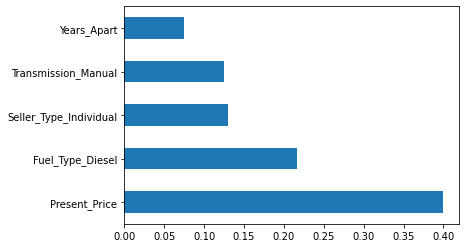

In [94]:
# Plotting the importance of feature importance for better visaulization
featImp = pd.Series(model.feature_importances_, index=X.columns)
featImp.nlargest(5).plot(kind='barh')
plt.show()

In [40]:
final_df.isnull().sum()

Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Years_Apart               0
                         ..
Car_Name_xcent            0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
Length: 106, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# RandomForest Regression  Model

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

### Tunning  HyperParameters 
    n_estimators , max_features ,max_Depth ,min_samples_split,min_samples_leaf

In [97]:
# Inputs for Random Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
random_grid= {
            'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf
        
            }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### RandomizedSearchCV

In [100]:

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(
                               estimator = rf, 
                               param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = 1
                              )

In [101]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   35.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [103]:

rf_random.best_score_

-4.264044495787921

In [104]:
pred = rf_random.predict(X_test)

C:\Users\Harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

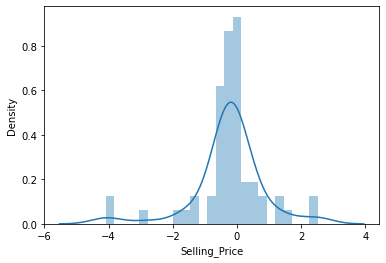

In [105]:
sns.distplot(y_test-pred) #Variance in Actual v Pred

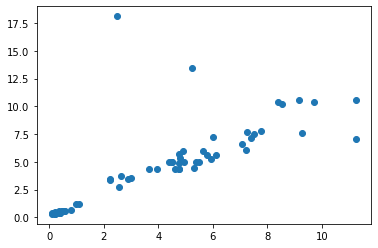

In [307]:

plt.scatter(y_test,pred)

In [106]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6737527868852498
MSE: 1.2336321585541024
RMSE: 1.1106899470842897


## Pickle 

In [110]:
import pickle
# open a file, where you ant to store the data
file = open('RFR_CarPrice.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [111]:
final_df

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Apart,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [58]:
type(X_train)

pandas.core.frame.DataFrame

In [109]:
X_train.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Years_Apart',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')